Кластеризация и анализ для датасета

https://docs.google.com/spreadsheets/d/1CL-cer9PqRdx3jTxxANnupHlEebzZWnutsCTleGJdk4/edit?gid=832318403#gid=832318403

In [ ]:
import numpy as np #работа с многомерными массивами
import pandas as pd #работа с числовыми таблицами и временными рядами
import matplotlib.pyplot as plt #визуализация (графики)
import scipy #пакет прикладных математических процедур
import scipy.stats as stats #статистические функции/критерии
import seaborn as sns #статистические графики
import math #математические операции с числами

# 1.Разведочный анализ данных (EDA)

## 1.1. Импорт данных + знакомство

Набор данных содержит данные об отзывах вин

*   Country - страна производства вина
*   Description - описание вкуса вина
*   Designation - наименование виноградника на территории винодельни
*   Points - количетво баллов дегустатора (от 1 до 100)
*   Price - стоимость бутылки вина
*   Province - провинция
*   Region_1 - место, где вырос виноград
*   Region_2 - конкретный регион производства винограда (детальнее Region_1)
*   Taster_name - имя дегустатора
*   Taster_twitter_handle - твиттер дегустатора
*   Title - наименование вина
*   Variety - вид вина
*   Winery - наименование винодельни



In [ ]:
wine = pd.read_csv('https://raw.githubusercontent.com/gauthiercler/wine-reviews/master/datasets/wine-reviews/winemag-data-130k-v2.csv')
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
pd.set_option('display.max_rows', None)
percent_missing=pd.DataFrame({'percent_missing': wine.isnull().sum()/len(wine)*100})
percent_missing[percent_missing['percent_missing']!=0]

,percent_missing
country,0.048472
designation,28.825661
price,6.921544
province,0.048472
region_1,16.347493
region_2,61.136715
taster_name,20.192197
taster_twitter_handle,24.015357
variety,0.000769


Типы данных в наборе


*   Категориальный (категоризованный): country, designation, province, region_1, region_2, variety
*   Категориальный (некатегоризованный): description, taster_name, taster_twitter_handle, title, winery
*   Количественный (непрерывный): price
*   Порядковый: points


In [ ]:
wine[['price','points']].describe()

,price,points
count,120975.000000,129971.000000
mean,35.363389,88.447138
std,41.022218,3.039730
min,4.000000,80.000000
25%,17.000000,86.000000
50%,25.000000,88.000000
75%,42.000000,91.000000
max,3300.000000,100.000000


Заполним пустые значения Nan признака price на основании среднего в группе points

In [ ]:
wine.groupby('points')['price'].mean()

points
80      16.372152
81      17.182353
82      18.870767
83      18.237353
84      19.310215
85      19.949562
86      22.133759
87      24.901884
88      28.687523
89      32.169640
90      36.906622
91      43.224252
92      51.037763
93      63.112216
94      81.436938
95     109.235420
96     159.292531
97     207.173913
98     245.492754
99     284.214286
100    485.947368
Name: price, dtype: float64

In [ ]:
wine['price'] = wine['price'].fillna(wine.groupby('points')['price'].transform('mean'))
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,24.901884,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## 1.2. Гистограммы + описательные статистики

<Axes: >

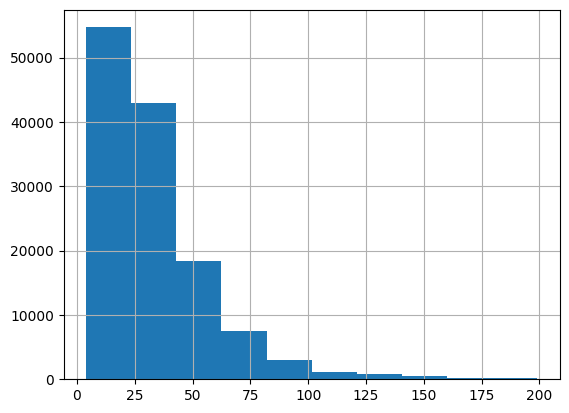

In [ ]:
wine[wine['price']<200]['price'].hist()

## 1.3. Анализ влияния количественного и порядкового признаков

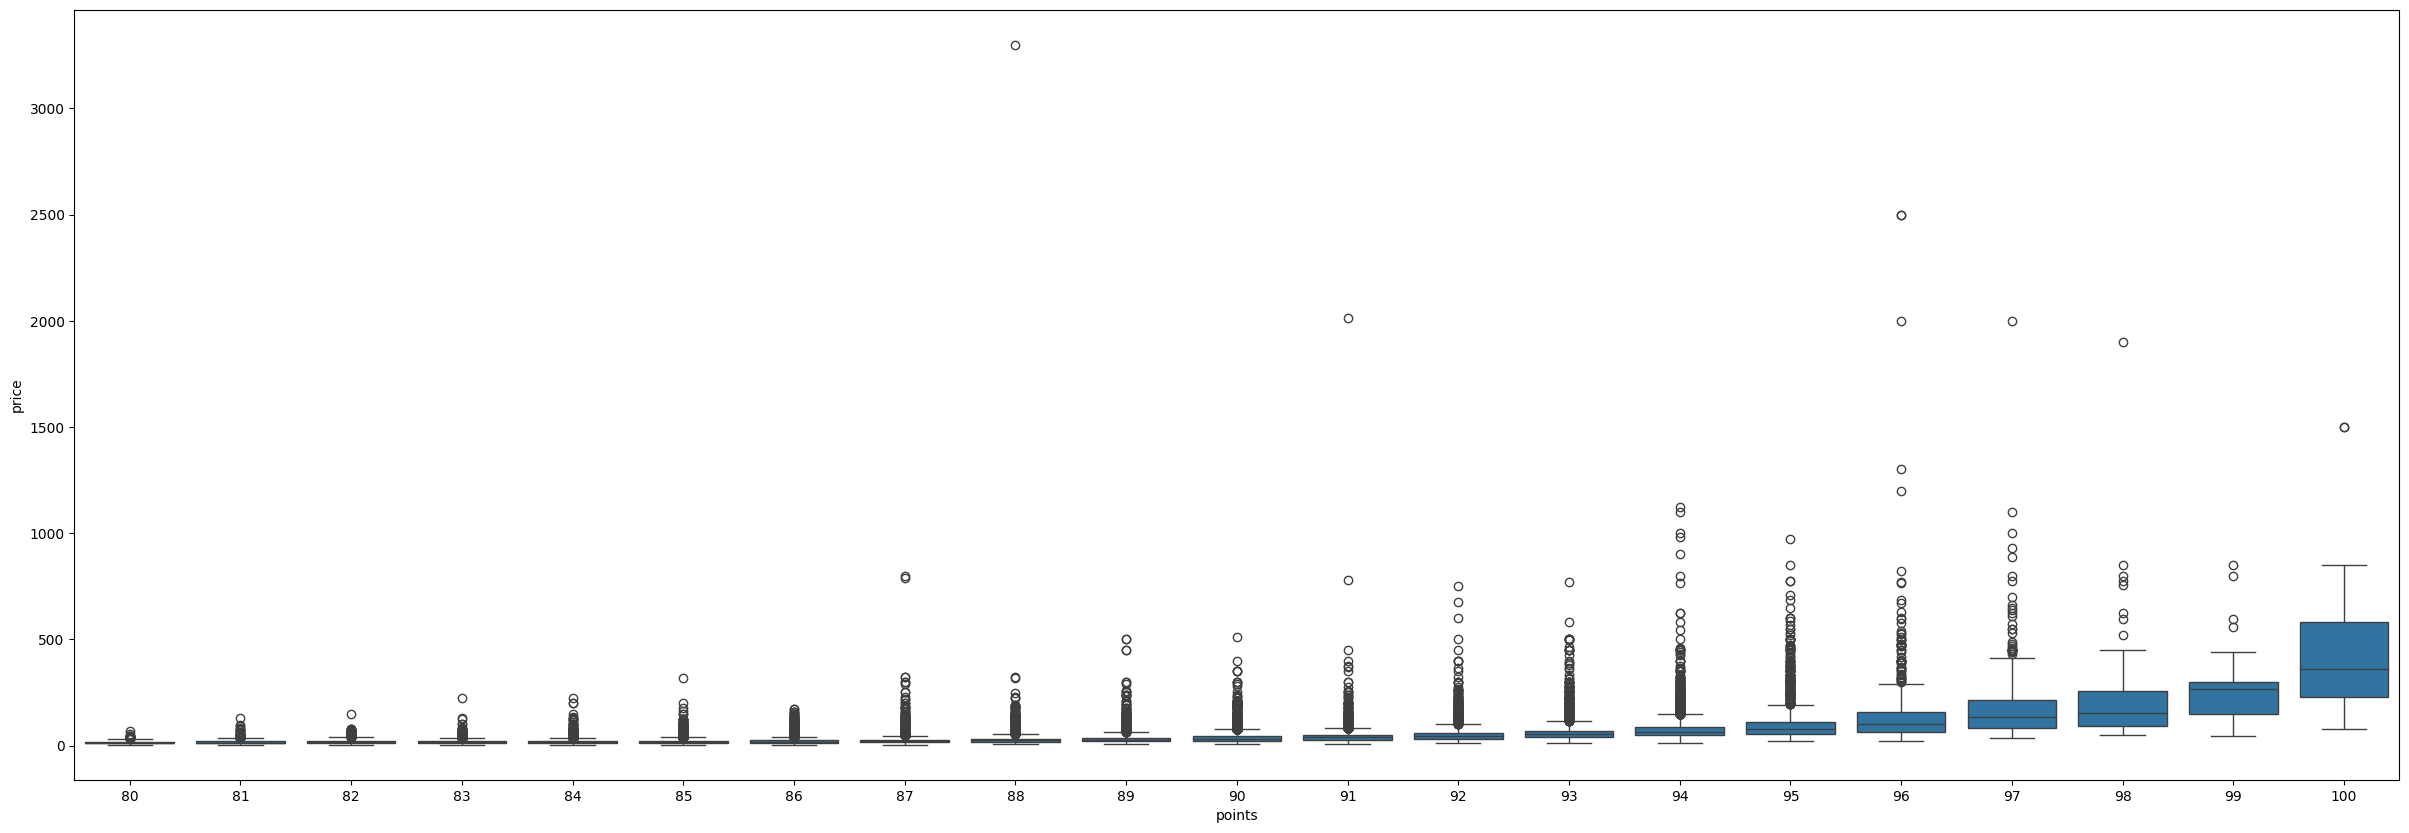

In [ ]:
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x='points', y='price', data=wine)

Обработаем выбросы

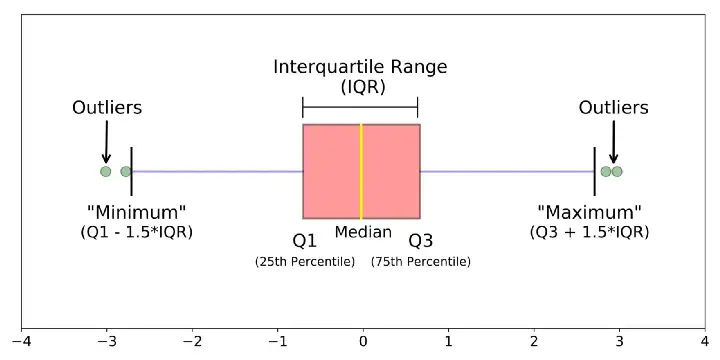

In [ ]:
for point in wine['points'].unique():
  Q1 = wine[wine['points']==point]['price'].quantile(0.25)
  Q3 = wine[wine['points']==point]['price'].quantile(0.75)
  IQR = Q3 - Q1
  upper = wine[(wine['points']==point)&(wine['price']>=(Q3+1.5*IQR))]
  lower = wine[(wine['points']==point)&(wine['price']<=(Q1-1.5*IQR))]
  wine.drop(upper.index, inplace = True)
  wine.drop(lower.index, inplace = True)

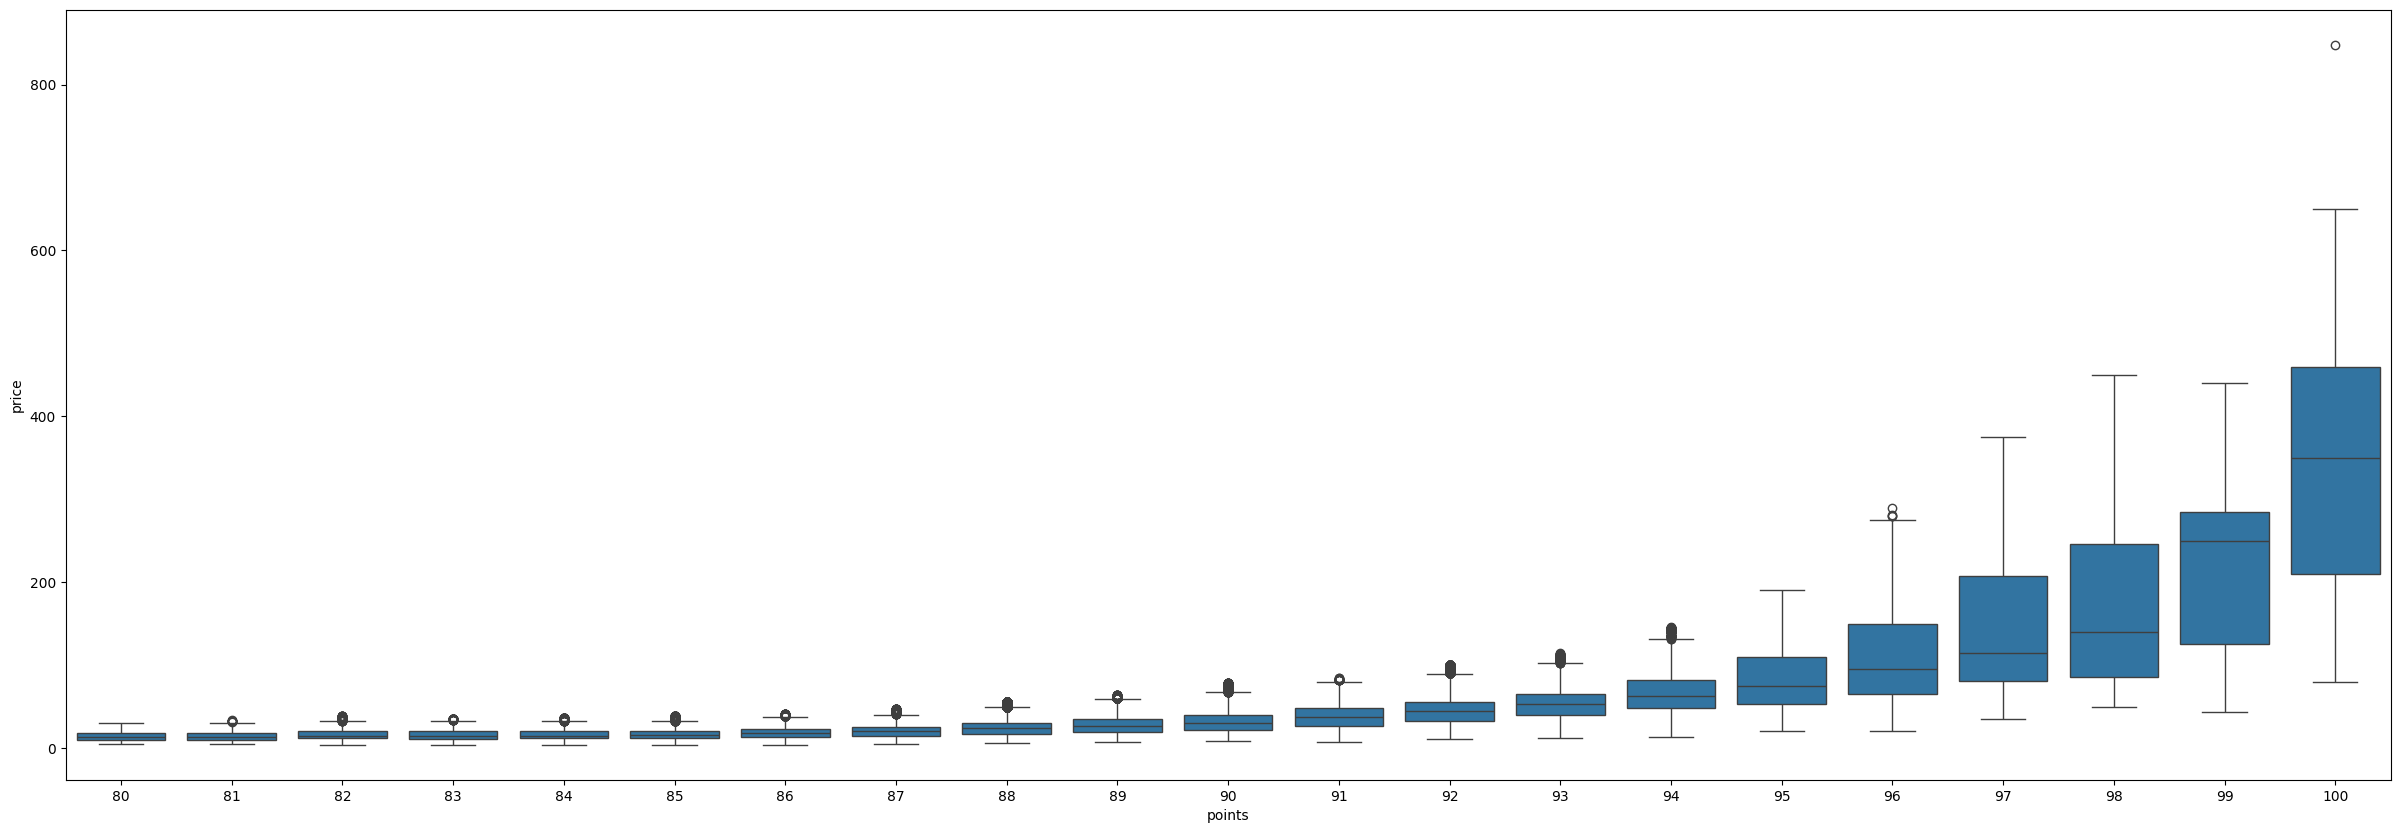

In [ ]:
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x='points', y='price', data=wine)

In [ ]:
print('Было 129971 наблюдений')
print('Стало '+str(len(wine))+' наблюдений')

Было 129971 наблюдений
Стало 121914 наблюдений


In [ ]:
wine[['points','price']].corr(method='spearman') # ранговая корреляция Спиремна

,points,price
points,1.000000,0.676769
price,0.676769,1.000000


Шкала Чеддока



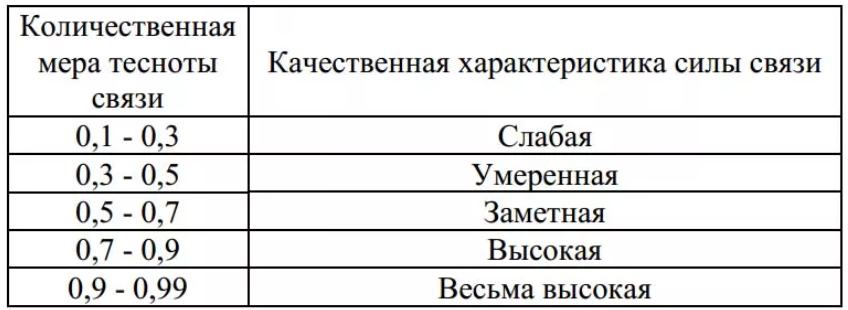

Стандартизация количественного фактора price

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(wine[['price']])
wine['price_scaled'] = scaler.transform(wine[['price']])
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,price_scaled
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,24.901884,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,-0.277299
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-0.735099
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-0.781333
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-0.827566
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.000000,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,-0.735099


# 2.Иерархичекая кластеризация

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
wine1=wine[wine['Unnamed: 0']<3000][['price_scaled','points']] #оставляем только часть наблюдений из-за ограниченной работы данного алгоритма с большими данными

## 2.1. Построение дендрограммы

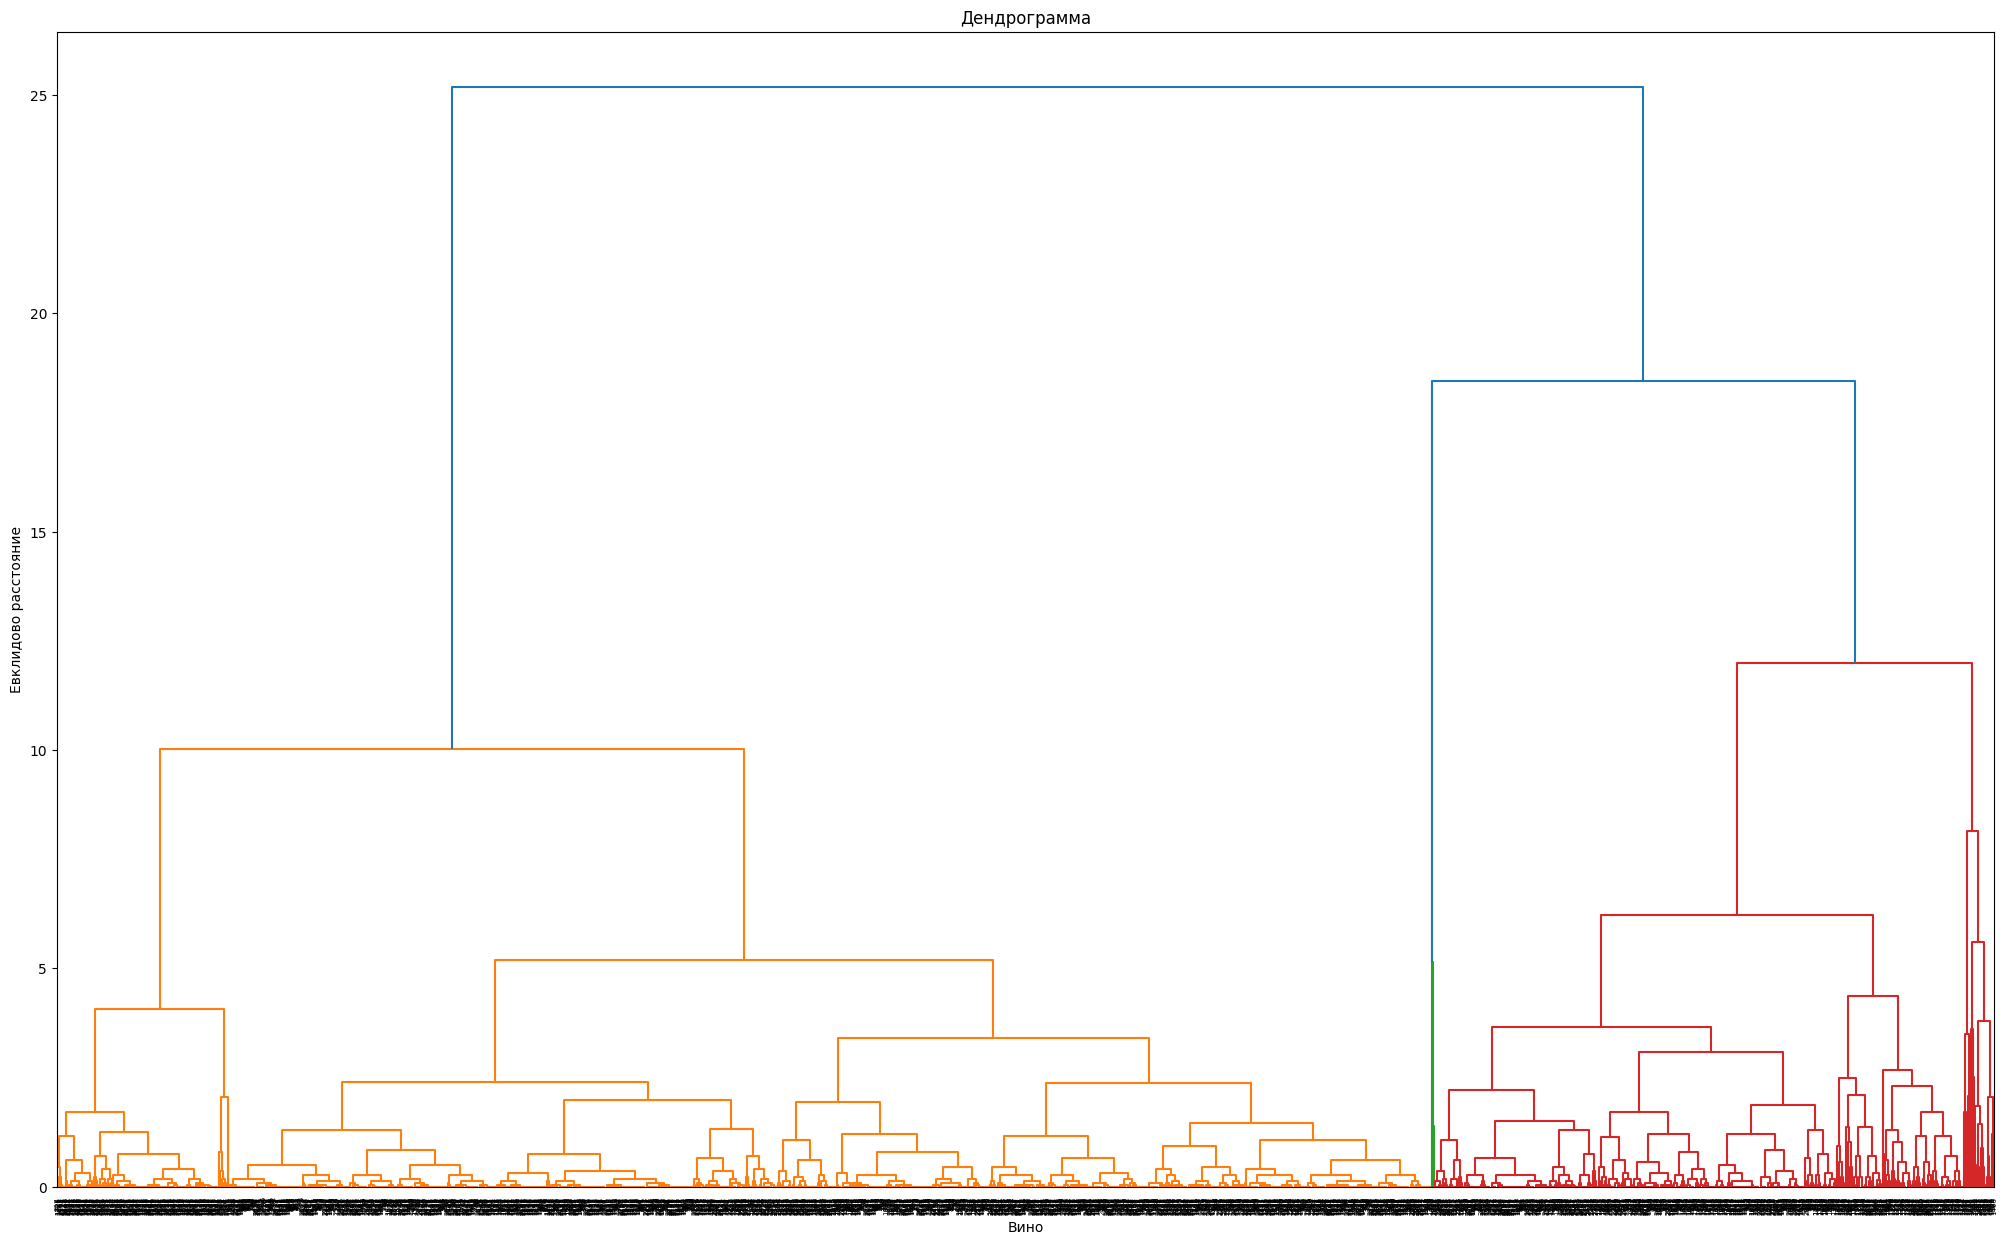

In [ ]:
fig = plt.figure(figsize=(25, 15))
dendrogram = sch.dendrogram(sch.linkage(wine1, method='complete')) #complete - метод полной связи

plt.title('Дендрограмма')
plt.xlabel('Вино')
plt.ylabel('Евклидово расстояние')
plt.show()

## 2.2.Кластеризация для разных объединений

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


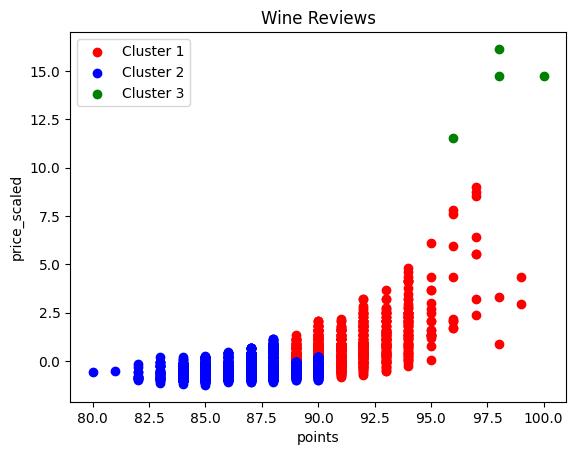

In [ ]:
# Реализация иерархической кластеризации методом полной связи или правило дальнего соседа
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete') #complete - метод полной связи
wine1['cluster'] = hierarchical_cluster.fit_predict(wine1)

plt.scatter(wine1[wine1['cluster'] == 0]['points'], wine1[wine1['cluster'] == 0]['price_scaled'], c = 'red', label = 'Cluster 1')
plt.scatter(wine1[wine1['cluster'] == 1]['points'], wine1[wine1['cluster'] == 1]['price_scaled'], c = 'blue', label = 'Cluster 2')
plt.scatter(wine1[wine1['cluster'] == 2]['points'], wine1[wine1['cluster'] == 2]['price_scaled'], c = 'green', label = 'Cluster 3')
plt.title('Wine Reviews')
plt.xlabel('points')
plt.ylabel('price_scaled')
plt.legend()
plt.show()

In [ ]:
wine1.groupby('cluster')[['points','price_scaled']].agg({'count','mean','median','min','max'})

points                             price_scaled                        \
           max min       mean median count          max        min       mean   
cluster                                                                         
0           99  89  91.621921   91.0   812     8.973966  -0.827566   0.939029   
1           90  80  86.760924   87.0  1991     1.114247  -1.243669  -0.474415   
2          100  96  98.000000   98.0     4    16.140181  11.516816  14.290835   

                          
            median count  
cluster                   
0         0.651910   812  
1        -0.550165  1991  
2        14.753171     4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


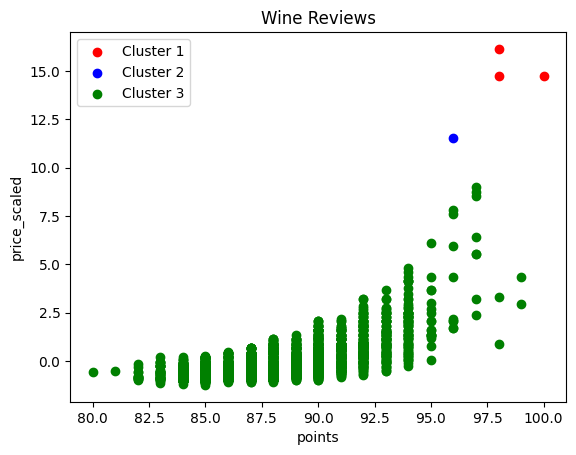

In [ ]:
# Реализация иерархической кластеризации методом одиночной связи или методом ближнего соседа
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single') #single - метод одиночной связи
wine1['cluster'] = hierarchical_cluster.fit_predict(wine1)

plt.scatter(wine1[wine1['cluster'] == 0]['points'], wine1[wine1['cluster'] == 0]['price_scaled'], c = 'red', label = 'Cluster 1')
plt.scatter(wine1[wine1['cluster'] == 1]['points'], wine1[wine1['cluster'] == 1]['price_scaled'], c = 'blue', label = 'Cluster 2')
plt.scatter(wine1[wine1['cluster'] == 2]['points'], wine1[wine1['cluster'] == 2]['price_scaled'], c = 'green', label = 'Cluster 3')
plt.title('Wine Reviews')
plt.xlabel('points')
plt.ylabel('price_scaled')
plt.legend()
plt.show()

In [ ]:
wine1.groupby('cluster')[['points','price_scaled']].agg({'count','mean','median','min','max'})

points                             price_scaled                        \
           max min       mean median count          max        min       mean   
cluster                                                                         
0          100  98  98.666667   98.0     3    16.140181  14.753171  15.215508   
1           96  96  96.000000   96.0     1    11.516816  11.516816  11.516816   
2           99  80  88.169105   88.0  2803     8.973966  -1.243669  -0.064955   

                          
            median count  
cluster                   
0        14.753171     3  
1        11.516816     1  
2        -0.318996  2803

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


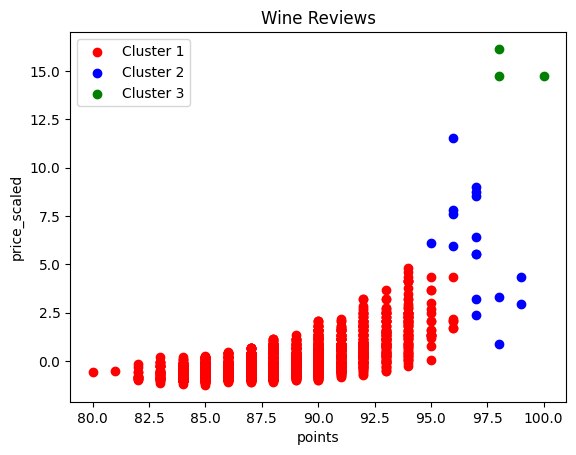

In [ ]:
# Реализация иерархической кластеризации методом средней связи
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average') #average - метод средней связи
wine1['cluster'] = hierarchical_cluster.fit_predict(wine1)

plt.scatter(wine1[wine1['cluster'] == 0]['points'], wine1[wine1['cluster'] == 0]['price_scaled'], c = 'red', label = 'Cluster 1')
plt.scatter(wine1[wine1['cluster'] == 1]['points'], wine1[wine1['cluster'] == 1]['price_scaled'], c = 'blue', label = 'Cluster 2')
plt.scatter(wine1[wine1['cluster'] == 2]['points'], wine1[wine1['cluster'] == 2]['price_scaled'], c = 'green', label = 'Cluster 3')
plt.title('Wine Reviews')
plt.xlabel('points')
plt.ylabel('price_scaled')
plt.legend()
plt.show()

In [ ]:
wine1.groupby('cluster')[['points','price_scaled']].agg({'count','mean','median','min','max'})

points                             price_scaled                        \
           max min       mean median count          max        min       mean   
cluster                                                                         
0           96  80  88.118048   88.0  2787     4.812938  -1.243669  -0.096945   
1           99  95  97.000000   97.0    17    11.516816   0.883078   5.860790   
2          100  98  98.666667   98.0     3    16.140181  14.753171  15.215508   

                          
            median count  
cluster                   
0        -0.318996  2787  
1         5.936070    17  
2        14.753171     3

# 3.Кластеризация методом K-means

In [ ]:
from sklearn.cluster import KMeans

## 3.1. Определим число кластеров

цель алгоритма — минимизировать сумму квадратов внутрикластерных расстояний до центра кластера (within-cluster sum of squares, WCSS, наша функция потерь)

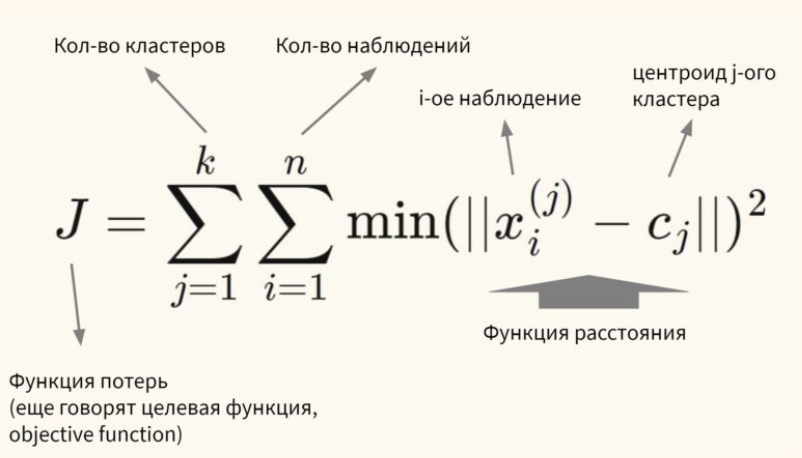

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

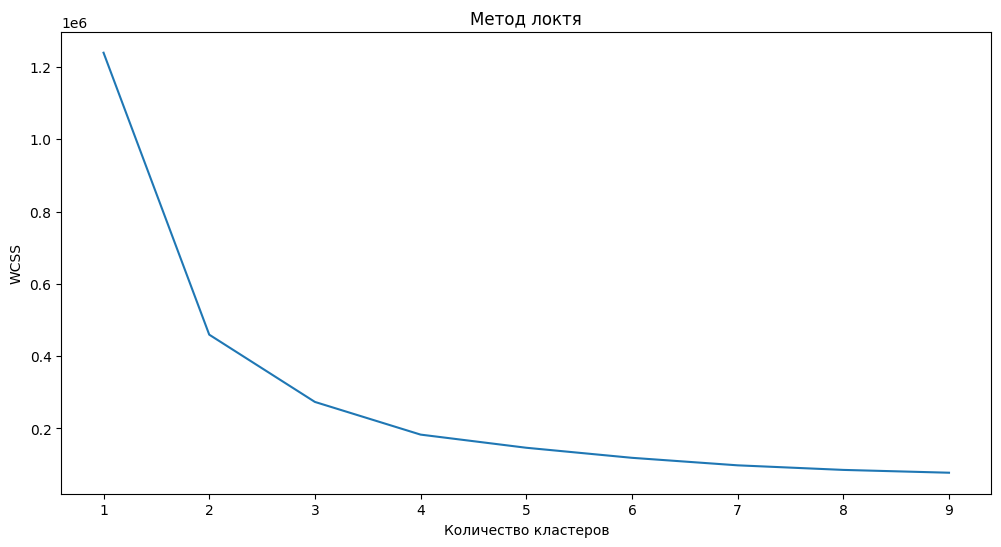

In [ ]:
WCSS = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(wine[["points", "price_scaled"]])
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), WCSS)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

## 3.2. Применение метода кластерного анализа

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

clusters = kmeans.fit_predict(wine[["points", "price_scaled"]])
wine["cluster"] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.cluster_centers_

array([[84.69973647, -0.60389407],
       [88.41352637, -0.20315182],
       [92.25979541,  0.96526084]])

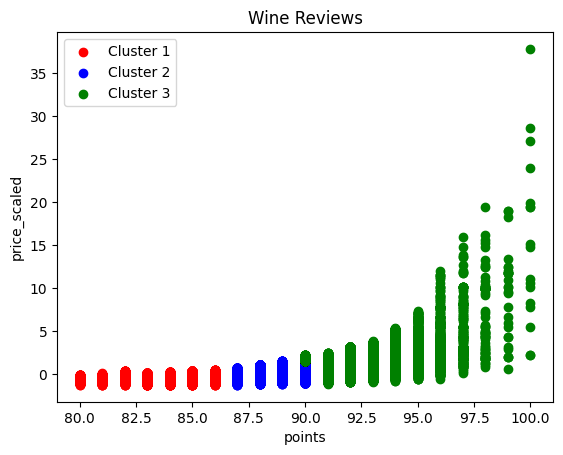

In [ ]:
plt.scatter(wine[wine['cluster'] == 0]['points'], wine[wine['cluster'] == 0]['price_scaled'], c = 'red', label = 'Cluster 1')
plt.scatter(wine[wine['cluster'] == 1]['points'], wine[wine['cluster'] == 1]['price_scaled'], c = 'blue', label = 'Cluster 2')
plt.scatter(wine[wine['cluster'] == 2]['points'], wine[wine['cluster'] == 2]['price_scaled'], c = 'green', label = 'Cluster 3')

plt.title('Wine Reviews')
plt.xlabel('points')
plt.ylabel('price_scaled')
plt.legend()
plt.show()

In [ ]:
wine.groupby('cluster')[['points','price_scaled']].agg({'count','min','mean','median','max'})

points                              price_scaled                      \
           max min       mean median  count          max       min      mean   
cluster                                                                        
0           86  80  84.699736   85.0  32255     0.466976 -1.243669 -0.603894   
1           90  87  88.413526   88.0  57399     1.530349 -1.197436 -0.203152   
2          100  90  92.259795   92.0  32260    37.777526 -1.104968  0.965261   

                          
           median  count  
cluster                   
0       -0.688866  32255  
1       -0.277299  57399  
2        0.744377  32260